In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re

# Statistics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('Life_Expectancy_clean.csv')
data.head()

,Life_Expectancy,State_FIPS_Code,County_FIPS_Code,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,...,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation___Black/White_raw_value,Residential_segregation___non_white/white_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,County_Ranked_(Yes1/No0),Drinking_water_violations_raw_value
0,72.438750,-1.694237,-0.703354,2.334237,0.585167,0.972298,0.744619,1.185344,1.262168,0.600135,...,-0.110904,0.526556,0.039599,-0.593029,-0.081090,0.093544,0.719976,-0.353999,0.149924,-0.857549
1,70.426037,-1.694237,-0.686844,2.505048,2.389854,2.887774,1.915747,1.184023,2.510570,0.882490,...,-1.719216,1.152966,0.039599,1.602039,1.899777,0.173994,-0.089176,-0.334493,0.149924,1.166115
2,75.056297,-1.694237,-0.670334,0.548239,0.430316,0.944534,0.598795,0.020882,1.220460,-0.082221,...,-0.568212,0.575578,-0.682870,-0.215187,1.632092,0.787929,-0.730263,-0.304624,0.149924,-0.857549
3,77.644415,-1.694237,-0.653824,-0.211277,-0.007011,0.261949,0.311151,-0.090746,0.551838,0.811901,...,0.847341,-0.419564,0.904034,-0.252510,-0.009707,1.220457,-0.453010,-0.053936,0.149924,-0.857549
4,74.386212,-1.694237,-0.637314,1.031308,1.168960,1.455216,1.086015,0.018399,1.406349,-0.199869,...,-0.276522,0.254347,0.039599,0.807143,0.953958,0.142721,-0.782571,-0.334972,0.149924,-0.857549


In [3]:
data.columns

Index(['Life_Expectancy', 'State_FIPS_Code', 'County_FIPS_Code',
       'Premature_death_raw_value', 'Poor_or_fair_health_raw_value',
       'Poor_physical_health_days_raw_value',
       'Poor_mental_health_days_raw_value', 'Low_birthweight_raw_value',
       'Adult_smoking_raw_value', 'Adult_obesity_raw_value',
       'Food_environment_index_raw_value', 'Physical_inactivity_raw_value',
       'Access_to_exercise_opportunities_raw_value',
       'Excessive_drinking_raw_value',
       'Alcohol_impaired_driving_deaths_raw_value',
       'Sexually_transmitted_infections_raw_value', 'Teen_births_raw_value',
       'Uninsured_raw_value', 'Primary_care_physicians_raw_value',
       'Dentists_raw_value', 'Mental_health_providers_raw_value',
       'Preventable_hospital_stays_raw_value',
       'Mammography_screening_raw_value', 'Flu_vaccinations_raw_value',
       'High_school_graduation_raw_value', 'Some_college_raw_value',
       'Unemployment_raw_value', 'Children_in_poverty_raw_value',
  

In [4]:
# County_Ranked_(Yes1/No0) is causing an issue therefore rename:
data.rename(columns={'County_Ranked_(Yes1/No0)': 'County_Ranked'}, inplace=True)

# Train Test Split

In [5]:
X_init = data.drop(columns=['Life_Expectancy'])
y_init = data['Life_Expectancy']

In [6]:
X_init.shape, y_init.shape

((2138, 60), (2138,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=1000, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1138, 60), (1000, 60), (1138,), (1000,))

In [9]:
X = X_train
y = y_train

In [10]:
df_model = pd.concat([y,X], axis=1)
df_model.head()

,Life_Expectancy,State_FIPS_Code,County_FIPS_Code,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,...,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation___Black/White_raw_value,Residential_segregation___non_white/white_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,County_Ranked,Drinking_water_violations_raw_value
813,77.858539,-0.340367,-0.554765,-0.091870,0.816641,1.022773,0.444620,-0.461421,-0.130554,-1.705759,...,-0.960806,0.853923,0.299279,-1.183209,0.115212,-1.286539,2.125187,-0.309893,0.149924,1.166115
1604,80.577406,0.916798,0.518378,-0.725498,-0.330078,-0.653514,-0.665404,-0.160177,-1.298671,-1.211639,...,0.545436,-0.279159,0.039599,0.298090,1.061032,0.565569,0.576227,-0.277381,0.149924,1.166115
406,74.986425,-1.017302,-0.736374,0.751385,1.156605,0.566277,0.490213,1.691675,0.459604,0.929549,...,-0.975835,0.864885,-0.715355,0.478539,-0.081090,0.591215,-0.353150,-0.353953,0.149924,-0.857549
778,81.993454,-0.437072,-0.752884,-1.256101,0.688591,-0.015012,-0.560650,0.282981,-0.633726,-2.011643,...,1.075192,0.876656,0.964274,0.328459,-1.990575,-4.940648,3.203709,2.494831,0.149924,-0.857549
1211,76.611541,0.239863,-0.769393,0.122952,-0.514874,0.116825,0.637500,-0.875349,-0.829082,-0.129280,...,-0.755572,0.338099,0.039599,-0.648674,4.326786,-0.508717,0.850042,-0.293960,0.149924,1.166115


In [11]:
# data['white_raw_value']

In [15]:
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     213.7
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:12:16   Log-Likelihood:                -1423.9
No. Observations:                1138   AIC:                             2970.
Df Residuals:                    1077   BIC:                             3277.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.3918      0.026   2978.831      0.000      77.341      77.443
State_FIPS_Code                                                 0.0351      0.034      1.027      0.305      -0.032       0.102
County_FIPS_Code                                                0.0538      0.034      1.575      0.116      -0.013       0.121
Premature_death_raw_value                                      -0.3538      0.119     -2.974      0.003      -0.587      -0.120
Poor_or_fair_health_raw_value                                   0.2180      0.123      1.775      0.076      -0.023       0.459
Poor_physical_health_days_raw_value                            -0.5566      0.300     -1.853      0.064      -1.146       0.033
Poor_mental_health_days_raw_value                               0.0436      0.188      0.232      0.817      -0.325       0.412
Low_birthweight_raw_value                                      -0.0063      0.046     -0.138      0.890      -0.097       0.084
Adult_smoking_raw_value                                         0.0937      0.076      1.239      0.216      -0.055       0.242
Adult_obesity_raw_value                                        -0.0165      0.044     -0.377      0.706      -0.103       0.070
Food_environment_index_raw_value                               -0.6562      0.517     -1.269      0.205      -1.671       0.358
Physical_inactivity_raw_value                                  -0.0114      0.052     -0.220      0.826      -0.113       0.090
Access_to_exercise_opportunities_raw_value                     -0.0279      0.039     -0.721      0.471      -0.104       0.048
Excessive_drinking_raw_value                                   -0.0586      0.051     -1.155      0.249      -0.158       0.041
Alcohol_impaired_driving_deaths_raw_value                       0.0189      0.028      0.663      0.507      -0.037       0.075
Sexually_transmitted_infections_raw_value                       0.0519      0.039      1.326      0.185      -0.025       0.129
Teen_births_raw_value                                           0.0512      0.058      0.890      0.374      -0.062       0.164
Uninsured_raw_value                                             2.0329      0.669      3.039      0.002       0.720       3.345
Primary_care_physicians_raw_value                              -0.0618      0.041     -1.499      0.134      -0.143       0.019
Dentists_raw_value                                              0.0221      0.037      0.602      0.548      -0.050       0.094
Mental_health_providers_raw_value                              -0.0111      0.032     -0.345      0.730      -0.074       0.052
Preventable

In [ ]:
drop = ['Premature_death_raw_value', ]

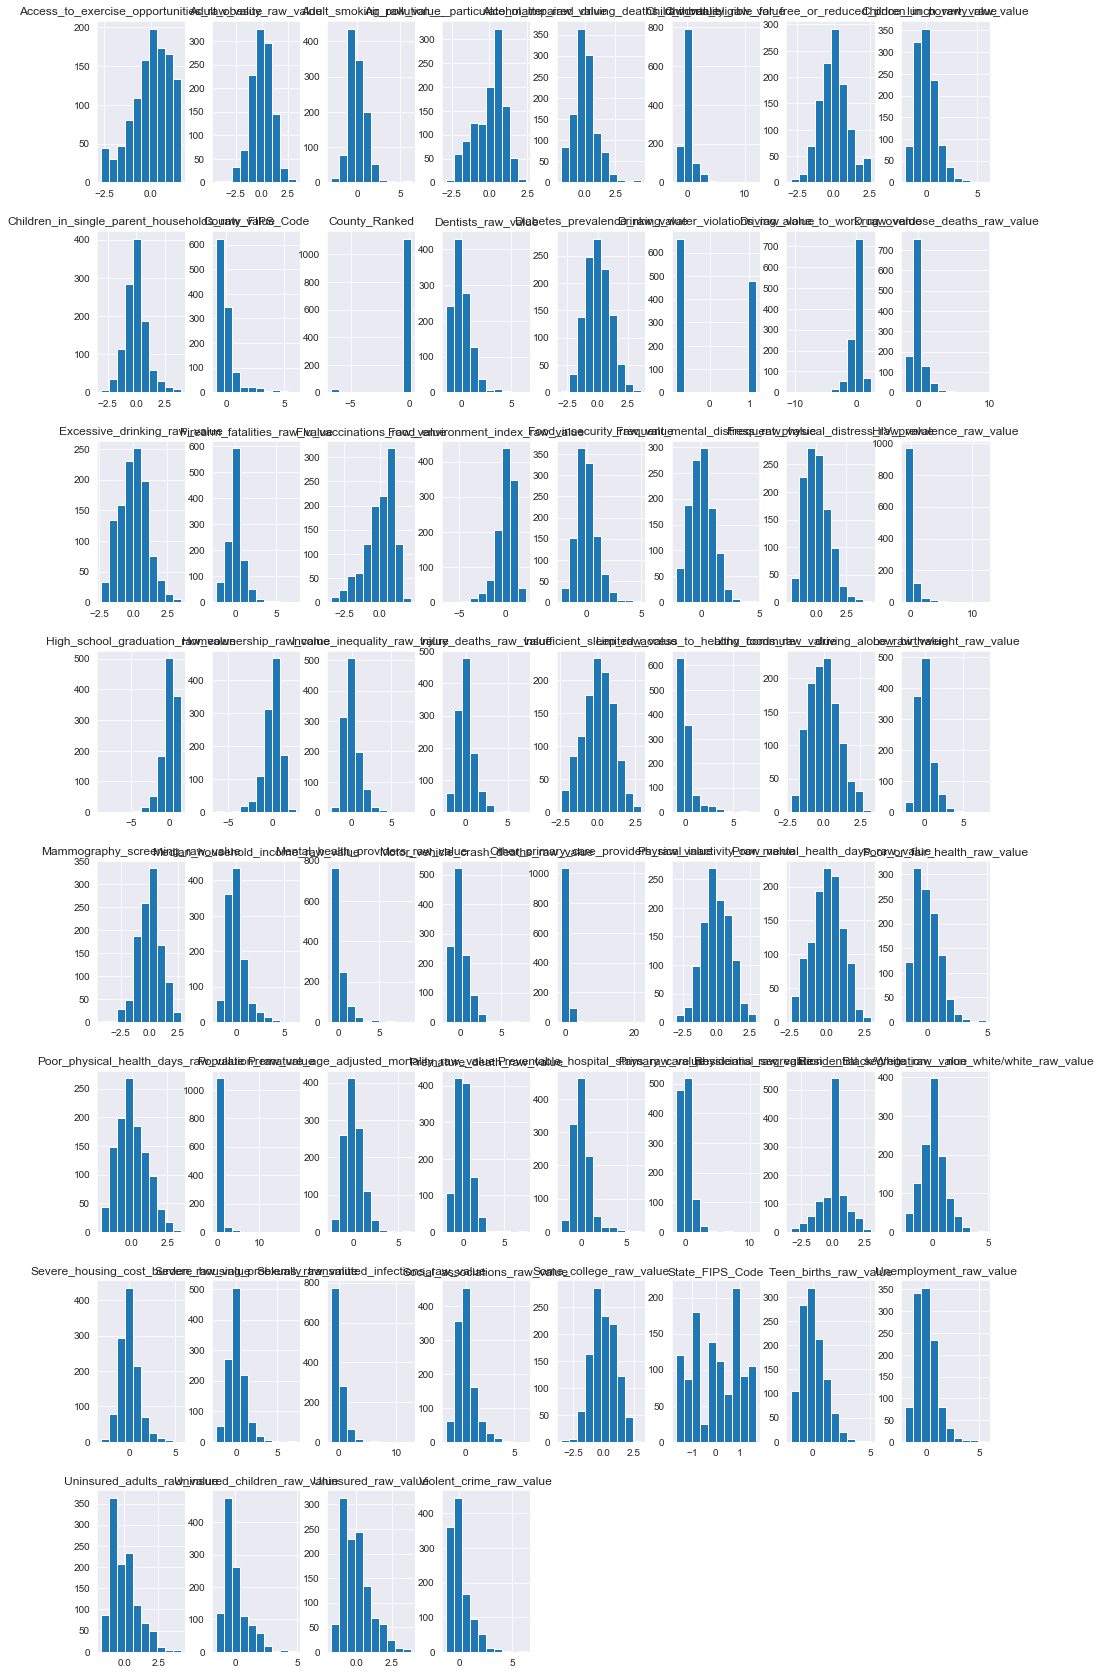

In [17]:
X.hist(figsize=(16,30))
plt.show()

# Create Initial Model

In [12]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
print("Inital R^2", baseline)

Inital R^2 0.9008491607675415


# Interactions 

In [13]:
def feature_combinations_r_sqrd_with_Inter_df(X, y, num_feat_comb=2):
    # Requires cals: baseline & crossvalidation
    
    # Create Regression & Combinations
    from itertools import combinations
    combinations = list(combinations(list(X.columns), num_feat_comb))
    
    # Create cross-validation & output a bassline MSE score as a DataFrame
    comb_scores = []
    inter_cols = []
    inter_score = []
    data = X.copy()
    
    for comb in combinations:
        data['interaction'] = data[comb[0]] * data[comb[1]]
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: 
            comb_scores.append(round(score,3))
            inter_cols.append((str(comb[0]) + '_' + str(comb[1])))
            inter_score.append(data[comb[0]] * data[comb[1]])
    
    df_base = pd.DataFrame(data=[inter_cols, comb_scores])
    df_base = df_base.T  
    df_base.rename(columns={0: "Interaction", 1: "CV_score"}, inplace=True)
    df_base.sort_values(by='CV_score', inplace = True, ascending=False )
    df_base.reset_index(drop=True, inplace = True)
    
    df_interactions_scores = pd.DataFrame(data=inter_score , index=inter_cols)
    df_interactions_scores = df_interactions_scores.T
    

    return df_base , df_interactions_scores

In [14]:
df_base, df_score = feature_combinations_r_sqrd_with_Inter_df(X,y)

In [15]:
df_base.head(10)

,Interaction,CV_score
0,Premature_death_raw_value_Premature_age_adjust...,0.912
1,Injury_deaths_raw_value_Premature_age_adjusted...,0.91
2,Adult_smoking_raw_value_Premature_age_adjusted...,0.91
3,Children_in_poverty_raw_value_Premature_age_ad...,0.909
4,Premature_death_raw_value_Adult_smoking_raw_value,0.909
5,Premature_death_raw_value_Children_in_poverty_...,0.908
6,Poor_physical_health_days_raw_value_Premature_...,0.908
7,Premature_age_adjusted_mortality_raw_value_Fre...,0.908
8,Premature_age_adjusted_mortality_raw_value_Fre...,0.908
9,Premature_death_raw_value_Frequent_physical_di...,0.908


In [16]:
def add_interaction_feature(data, df_inter, df_score, num_inter):
    i=0
    
    while i < num_inter:
        col = df_inter['Interaction'][i]
  
        data[col] = df_score[col]
        i+=1
    
    return data

In [17]:
data_combined = add_interaction_feature(X, df_base, df_score, 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
data_combined.head()

,State_FIPS_Code,County_FIPS_Code,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,...,Premature_death_raw_value_Premature_age_adjusted_mortality_raw_value,Injury_deaths_raw_value_Premature_age_adjusted_mortality_raw_value,Adult_smoking_raw_value_Premature_age_adjusted_mortality_raw_value,Children_in_poverty_raw_value_Premature_age_adjusted_mortality_raw_value,Premature_death_raw_value_Adult_smoking_raw_value,Premature_death_raw_value_Children_in_poverty_raw_value,Poor_physical_health_days_raw_value_Premature_age_adjusted_mortality_raw_value,Premature_age_adjusted_mortality_raw_value_Frequent_mental_distress_raw_value,Premature_age_adjusted_mortality_raw_value_Frequent_physical_distress_raw_value,Premature_death_raw_value_Frequent_physical_distress_raw_value
813,-0.340367,-0.554765,-0.091870,0.816641,1.022773,0.444620,-0.461421,-0.130554,-1.705759,-1.195167,...,0.008252,0.028032,0.011727,-0.106116,0.011994,-0.108531,-0.091871,-0.079626,-0.108639,-0.111111
1604,0.916798,0.518378,-0.725498,-0.330078,-0.653514,-0.665404,-0.160177,-1.298671,-1.211639,0.363873,...,0.631074,0.430578,1.129648,0.383412,0.942183,0.319784,0.568459,0.669600,0.564007,0.470410
406,-1.017302,-0.736374,0.751385,1.156605,0.566277,0.490213,1.691675,0.459604,0.929549,-0.329034,...,0.608975,0.348957,0.372495,0.975223,0.345340,0.904128,0.458950,0.560722,0.560777,0.519896
778,-0.437072,-0.752884,-1.256101,0.688591,-0.015012,-0.560650,0.282981,-0.633726,-2.011643,1.143393,...,1.507524,2.258487,0.760573,-0.036626,0.796023,-0.038334,0.018017,0.656272,-0.348493,-0.364737
1211,0.239863,-0.769393,0.122952,-0.514874,0.116825,0.637500,-0.875349,-0.829082,-0.129280,0.104033,...,0.004065,0.091658,-0.027410,0.010430,-0.101937,0.038790,0.003862,0.007520,-0.004424,-0.016453


# Polynomial Parameters

In [19]:
# from sklearn.preprocessing import PolynomialFeatures

# regression = LinearRegression()
# crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# polynomials = []
# for col in X.columns:
#     for degree in [2, 3, 4]:
#         data = X.copy()
#         poly = PolynomialFeatures(degree, include_bias=False)
#         X_transformed = poly.fit_transform(X[[col]])
#         data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
#         score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#         if score > baseline: polynomials.append((col, degree, round(score, 3)))
# print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

In [20]:
# polynom = pd.DataFrame(polynomials)
# polynom.groupby([0], sort=False)[2].max()

# Full model R-squared  

In [21]:
full_model = np.mean(cross_val_score(regression, data_combined, y, scoring='r2', cv=crossvalidation))
print("Full model R^2:", full_model)

Full model R^2: 0.9110722619631512
